<font size="6"><font color='red'><center>**TIME SERIES ANALYSIS PROJECT**</center></font></font>
<hr>

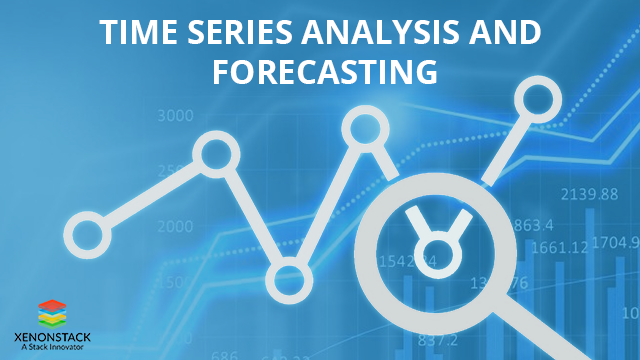

<font size="5"><font color='red'><center>**about data**</center></font></font>


In [244]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

<font size="5"><font color='red'><center>**DATA**</center></font></font>

In [245]:
df = pd.read_csv('global.txt', delimiter=',')
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [246]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [247]:
df.shape

(577462, 4)

In [248]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


<font size="5"><font color='red'>**EXPLORATORY DATA ANALYSIS**</font></font>

In [250]:
#checking the presence of null values
df.isnull().any()

dt                               False
AverageTemperature                True
AverageTemperatureUncertainty     True
Country                          False
dtype: bool

In [251]:
#checking total null values
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [252]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [253]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [254]:
df['Country']

0            Åland
1            Åland
2            Åland
3            Åland
4            Åland
            ...   
577457    Zimbabwe
577458    Zimbabwe
577459    Zimbabwe
577460    Zimbabwe
577461    Zimbabwe
Name: Country, Length: 577462, dtype: object

In [255]:
# total number of unique countries
len(df.Country.unique())

243

## selecting data of  germany for time series analysis

In [256]:
df_Germany = df.drop(['AverageTemperatureUncertainty', ], axis=1)

In [257]:
df_Germany = df_Germany[df_Germany.Country == "Germany"]

In [258]:
df_Germany.head()

,dt,AverageTemperature,Country
201440,1743-11-01,5.468,Germany
201441,1743-12-01,NaN,Germany
201442,1744-01-01,NaN,Germany
201443,1744-02-01,NaN,Germany
201444,1744-03-01,NaN,Germany


In [259]:
df_Germany = df_Germany.drop('Country',axis=1)

In [260]:
df_Germany

,dt,AverageTemperature
201440,1743-11-01,5.468
201441,1743-12-01,NaN
201442,1744-01-01,NaN
201443,1744-02-01,NaN
201444,1744-03-01,NaN
...,...,...
204674,2013-05-01,12.151
204675,2013-06-01,15.927
204676,2013-07-01,19.762
204677,2013-08-01,18.233


In [261]:
df_Germany.index = pd.to_datetime(df_Germany.dt)

In [262]:
df_Germany

,dt,AverageTemperature
dt,,
1743-11-01,1743-11-01,5.468
1743-12-01,1743-12-01,NaN
1744-01-01,1744-01-01,NaN
1744-02-01,1744-02-01,NaN
1744-03-01,1744-03-01,NaN
...,...,...
2013-05-01,2013-05-01,12.151
2013-06-01,2013-06-01,15.927
2013-07-01,2013-07-01,19.762


In [263]:
df_Germany = df_Germany.drop('dt', axis=1)

In [264]:
df_Germany

,AverageTemperature
dt,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [265]:
# Filtering data starting from 1970-01-01
df_Germany = df_Germany.loc['1970-01-01':]

In [266]:
# final daata of germany from 1970 to 2013

In [267]:
df_Germany

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [268]:
df_Germany.shape

(525, 1)

In [269]:
# Testing whether there are null values
df_Germany[df_Germany.isnull()]

,AverageTemperature
dt,
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [270]:
len(df_Germany[df_Germany.isnull()])

525

In [271]:
df_Germany = df_Germany.sort_index()

In [272]:
df_Germany.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [273]:
# Replacing NaN values with the previous effective data
df_Germany.AverageTemperature.fillna(method='pad', inplace=True)

In [274]:
df_Germany[df_Germany.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [275]:
df_Germany.describe()

,AverageTemperature
count,525.000000
mean,8.895307
std,6.695429
min,-6.281000
25%,3.306000
50%,8.417000
75%,15.011000
max,22.343000


<font size="5"><font color='red'>**TRAIN-TEST SPLIT**</font></font>

In [276]:
train=df_Germany[0:406] 
test=df_Germany[406:]

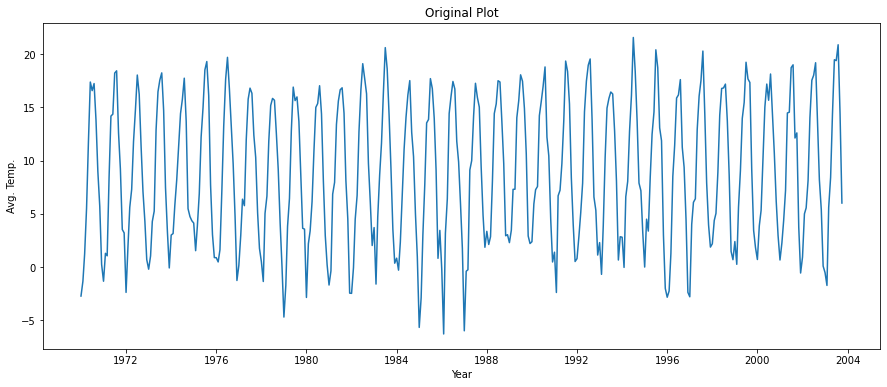

In [277]:
#very simple plotting of training data 

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('AverageTemperature', data = train);

<font size="5"><font color='red'>**DECOMPOSITION**</font></font>
* It allows us to decompose our time series into three distinct components
1. Trend
2. Seasonality
3. Noise

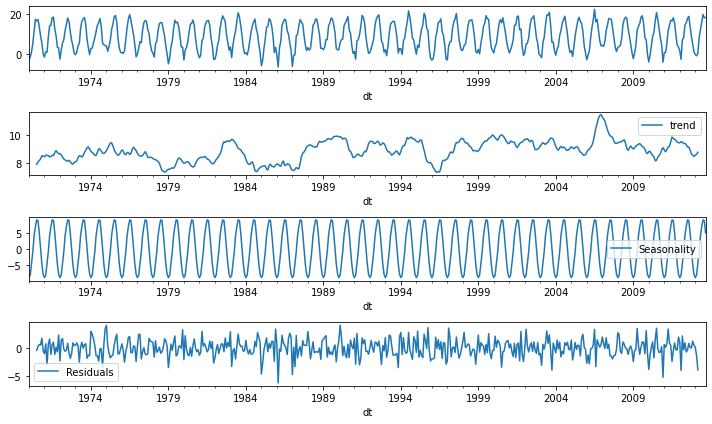

In [278]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df_Germany.AverageTemperature,model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df_Germany.AverageTemperature.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [279]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

<font size="5"><font color='red'>**holt's winter exponential smoothing**</font></font>

In [280]:
# holt's winter exponential smoothing
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,406
Model:,ExponentialSmoothing,SSE,1396.824
Optimized:,True,AIC,533.655
Trend:,Additive,BIC,597.756
Seasonal:,Additive,AICC,535.422
Seasonal Periods:,12,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,19:27:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0526316,alpha,True
smoothing_slope,0.0526316,beta,True


In [281]:
hwes1 = hwes.forecast(119)

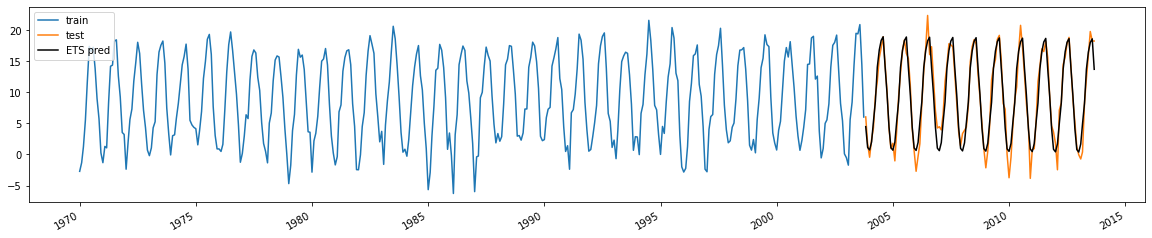

In [282]:

plt.plot(train.AverageTemperature,label='train')
plt.legend()
plt.plot(test.AverageTemperature,label='test')
plt.legend()
hwes1.plot(kind="line",figsize=(20,4),color='black',legend=True,label='ETS pred'); 

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [284]:
print(mean_absolute_error(y_true=test,y_pred=hwes1))

1.3757299160735443


In [285]:
np.sqrt(mean_squared_error(test, hwes1))

1.8252646569536575

<font size="5"><font color='red'>**S-ARIMA MODEL BUILDING**</font></font>

In [288]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = pd.core.window.Rolling(ts, window=12).mean()
    roll_std  = pd.core.window.Rolling(ts, window=12).std()
    # Plot rolling statistics:
    plt.figure(figsize=(15,6))
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(roll_std, color='red', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

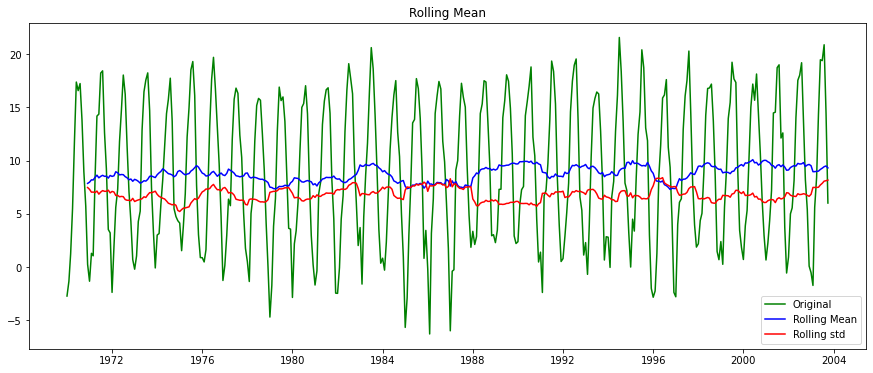

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.1233694050502216, 0.02487139487490222, 12, 393, {'1%': -3.447099431978147, '5%': -2.8689225261604263, '10%': -2.57070269105012}, 1583.1952344131055)
df_output: 
 Test Statistic                  -3.123369
p-value                          0.024871
#Lags Used                      12.000000
Number of Observations Used    393.000000
dtype: float64
Test Statistic                  -3.123369
p-value                          0.024871
#Lags Used                      12.000000
Number of Observations Used    393.000000
Critical Value (1%)             -3.447099
Critical Value (5%)             -2.868923
Critical Value (10%)            -2.570703
dtype: float64


In [289]:
stationarity_check(train.AverageTemperature)

here , p value is less than 0.05 so we can say that the data is stationary. 

In [290]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

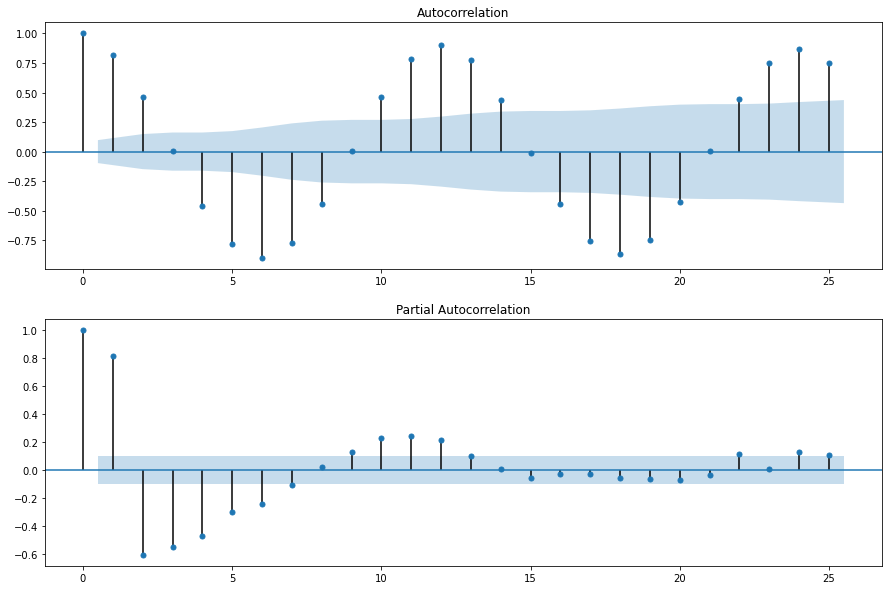

In [291]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(train.AverageTemperature, ax=pyplot.gca(),lags=25)
pyplot.subplot(212)
plot_pacf(train.AverageTemperature, ax=pyplot.gca(),lags=25)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1782.917, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1693.868, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1781.061, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1780.520, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1662.911, Time=1.14 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=1656.782, Time=2.42 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=11.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.60 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1665.081, Time=2.21 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=1658.676, Time=3.32 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=1658.522, Time=6.60 sec
 ARIMA(0,0,1)(3,1,0)[12] intercept   : AIC=1657.246, Time=2.38 sec
 ARIMA(2,0,1)(3,1,0)[12] intercept   : AIC=1658.254, Time=8.88 sec
 ARIMA(1,0,0)(3,1,0)[12]         

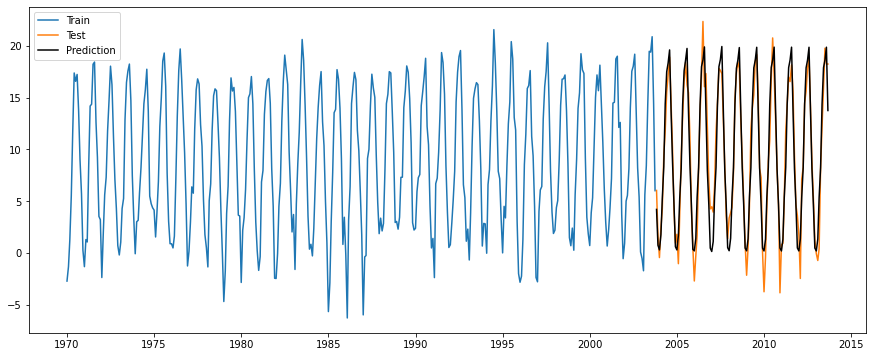

In [222]:
from pmdarima.arima import auto_arima
model = auto_arima(train.AverageTemperature, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=3, max_Q=3, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train.AverageTemperature)

forecast = model.predict(n_periods=len(test.AverageTemperature))
forecast = pd.DataFrame(forecast,index = test.AverageTemperature.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(15,6))

plt.plot(train.AverageTemperature, label='Train')
plt.legend()
plt.plot(test.AverageTemperature, label='Test')
plt.legend()
plt.plot(forecast, label='Prediction', color='black')
plt.legend()
plt.show()

In [223]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  406
Model:             SARIMAX(1, 0, 0)x(3, 1, 0, 12)   Log Likelihood                -822.659
Date:                            Wed, 30 Sep 2020   AIC                           1655.318
Time:                                    19:21:33   BIC                           1675.199
Sample:                                         0   HQIC                          1663.196
                                            - 406                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1644      0.048      3.455      0.001       0.071       0.258
ar.S.L12      -0.6364      0.045   

In [224]:
from statsmodels.tsa.arima_model import ARIMA

In [225]:
model_ = sm.tsa.SARIMAX(train, order=(1,0,0), seasonal_order=(3,1,0,12))

C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [226]:
model_fit=model_.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                  406
Model:             SARIMAX(1, 0, 0)x(3, 1, 0, 12)   Log Likelihood                -822.659
Date:                            Wed, 30 Sep 2020   AIC                           1655.318
Time:                                    19:21:43   BIC                           1675.199
Sample:                                01-01-1970   HQIC                          1663.196
                                     - 10-01-2003                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1644      0.048      3.455      0.001       0.071       0.258
ar.S.L12      -0.6364      0.045   

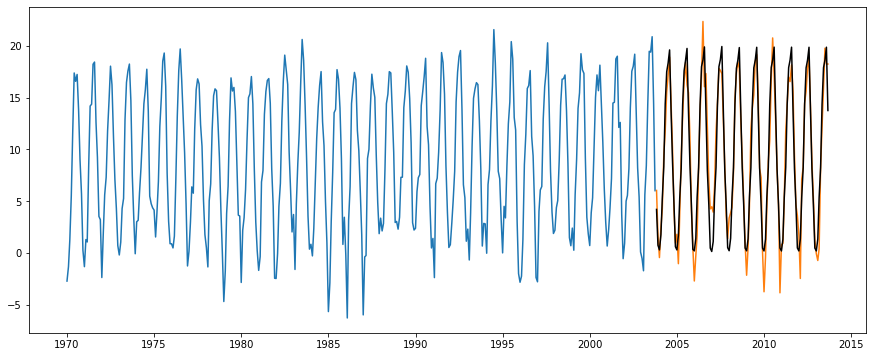

In [227]:
forecast = model_fit.forecast(steps=119)
#print(forecast)

#plot the predictions for validation set
plt.figure(figsize=(15,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [228]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

1.541063610129459


In [229]:
np.sqrt(mean_squared_error(test, forecast))

1.9866193414043445

# comparison of models

<br>







**MODELS**|**RMSE**
-----------------|--------------
holt's winter exponential smoothing  | 1.8252646569536575
S-ARIMA |1.9866193414043445



**so RMSE value of hwes model is lesser than RMSE of S-ARIMA so we will do forecasting using HWES.** 







<br>

<font size="5"><font color='red'>final forecasting of next 24 months using **HOLT'S WINTER EXPONENTIAL SMOOTHING**</font></font>

In [292]:
hwes_final = ExponentialSmoothing(df_Germany , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes_final.summary()

C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,525
Model:,ExponentialSmoothing,SSE,1521.729
Optimized:,True,AIC,590.707
Trend:,Additive,BIC,658.922
Seasonal:,Additive,AICC,592.059
Seasonal Periods:,12,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,19:29:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0593459,alpha,True
smoothing_slope,3.3645e-18,beta,True


In [293]:
hwes1_final = hwes_final.forecast(27)

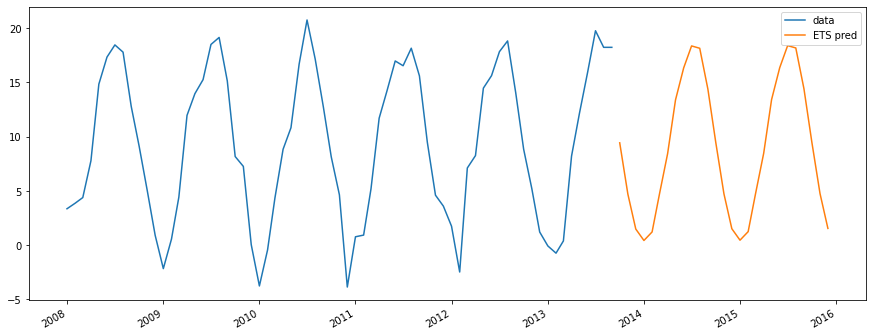

In [297]:
plt.plot(df_Germany.loc['2008-01-01':],label='data')
plt.legend()
hwes1_final.plot(kind="line",figsize=(15,6),legend=True,label='ETS pred');

In [298]:
print(hwes1_final)

2013-10-01     9.436545
2013-11-01     4.705976
2013-12-01     1.491892
2014-01-01     0.436456
2014-02-01     1.223015
2014-03-01     4.711931
2014-04-01     8.441020
2014-05-01    13.388993
2014-06-01    16.336398
2014-07-01    18.362396
2014-08-01    18.147385
2014-09-01    14.383213
2014-10-01     9.465218
2014-11-01     4.734650
2014-12-01     1.520565
2015-01-01     0.465129
2015-02-01     1.251688
2015-03-01     4.740605
2015-04-01     8.469693
2015-05-01    13.417666
2015-06-01    16.365072
2015-07-01    18.391069
2015-08-01    18.176058
2015-09-01    14.411886
2015-10-01     9.493892
2015-11-01     4.763323
2015-12-01     1.549238
Freq: MS, dtype: float64
